<a href="https://colab.research.google.com/github/NiklasSlager/EquDist/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet -U git+https://github.com/NiklasSlager/EquDist.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 7.1 MB/s eta 0:00:00


0.1733074188232422
1


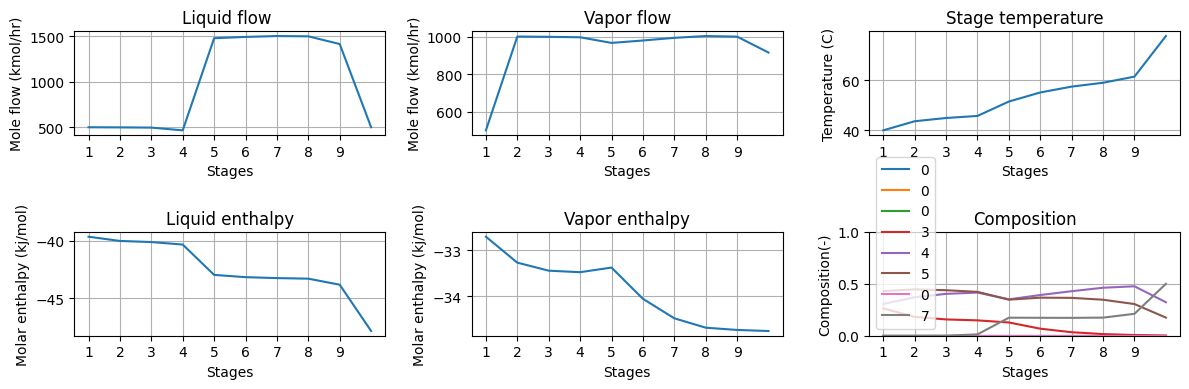

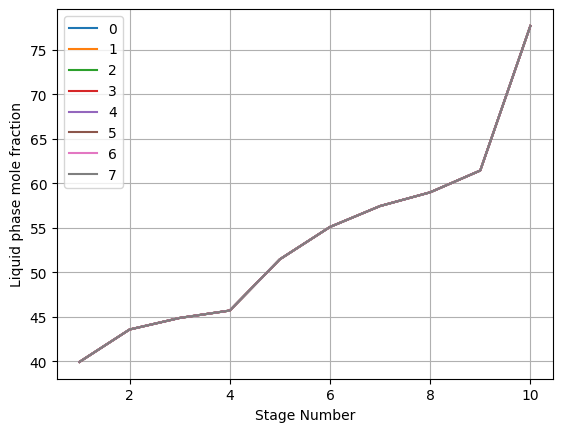

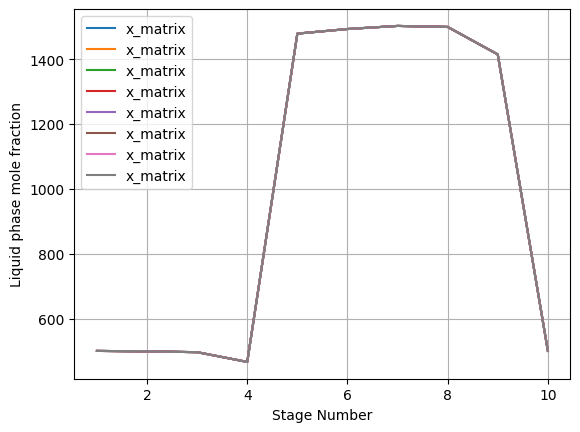

In [5]:
import jax.numpy as jnp
from time import time
from jax import jit, vmap
import matplotlib.pyplot as plt
from NR_model_test.plot_generation import plot_function
from NR_model_test.NR_model import inside_simulation as simulation
from NR_model_test.NR_model import initialize
from NR_model_test.NR_model import initialize
import os

state_init= initialize()
zf = jnp.array([0., 0., 0., 0.5, 0.5, 0.5, 0., 0.5])
zf = zf/jnp.sum(zf)

st = time()
state, iterations, res = jit(simulation)(
    state_init,
    jnp.array(10, dtype=int),
    jnp.array(5, dtype=int),
    jnp.array(2.0, dtype=float),
    jnp.array(1000.0, dtype=float),
    jnp.array(zf, dtype=float),
    jnp.array(500, dtype=float),
    jnp.array(1, dtype=float)
)

print(time()-st)
print(iterations)
plot_function(jnp.arange(1, state.Nstages+1), state.L[0:state.Nstages], state.V[0:state.Nstages], state.temperature[0:state.Nstages], state.Hliq[0:state.Nstages], state.Hvap[0:state.Nstages], state.X[jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages], state.Y[jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages], jnp.where(zf != 0, jnp.arange(0, len(zf)), 0))
#plot_function(jnp.arange(1, state.Nstages[0]+1), state.L[0, 0:state.Nstages[0]], state.V[0, 0:state.Nstages[0]], state.temperature[0, 0:state.Nstages[0]], state.Hliq[0, 0:state.Nstages[0]], state.Hvap[0, 0:state.Nstages[0]], state.X[0, jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages[0]], state.Y[0, jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages[0]], jnp.where(zf != 0, jnp.arange(0, len(zf)), 0))

plt.show()
